# link [here](https://colab.research.google.com/drive/1WIZBHix_cYIGsBKa4phIwCq5qXwO8fRX)

In [ ]:
!pip install tensorflow-gpu imageio tensorflow-addons

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [27]:
from IPython.display import clear_output, display, Image

In [2]:
image_url = 'https://image.cache.storm.mg/styles/smg-800x533-fp/s3/media/image/2018/05/04/20180504-121753_U3792_M408801_734b.jpg'  #@param {type: "string"}

In [3]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")
import os
import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}

--2020-04-18 07:49:02--  https://image.cache.storm.mg/styles/smg-800x533-fp/s3/media/image/2018/05/04/20180504-121753_U3792_M408801_734b.jpg
Resolving image.cache.storm.mg (image.cache.storm.mg)... 13.35.7.107, 13.35.7.2, 13.35.7.22, ...
Connecting to image.cache.storm.mg (image.cache.storm.mg)|13.35.7.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39831 (39K) [image/jpeg]
Saving to: ‘20180504-121753_U3792_M408801_734b.jpg’

20180504-121753_U37 100%[===================>]  38.90K  --.-KB/s    in 0.04s   

2020-04-18 07:49:03 (959 KB/s) - ‘20180504-121753_U3792_M408801_734b.jpg’ saved [39831/39831]



In [5]:
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

In [6]:
display(Image(png_path))

NameError: name 'png_path' is not defined

In [13]:
styles = "hosoda" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [17]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal

2020-04-18 07:58:53.603490: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-18 07:58:53.603603: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-18 07:58:53.603622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
[2020-04-18 07:58:55] [Cartoo

In [15]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)

In [ ]:
display(Image(result_path))

## 建立普普風照片

In [50]:
style_lists = ["shinkai", "hayao", "hosoda", "paprika"]

In [54]:
new_img_filename = "Lenna.png"

In [55]:
# load four styles
fns = []
for style in style_lists:
    !python cartoonize.py --batch_size 1 --styles {style}
    fns.append(os.path.join(output_image_dir, style, new_img_filename))

2020-04-18 08:31:04.655778: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-18 08:31:04.655896: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-18 08:31:04.655912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
[2020-04-18 08:31:06] [Cartoo

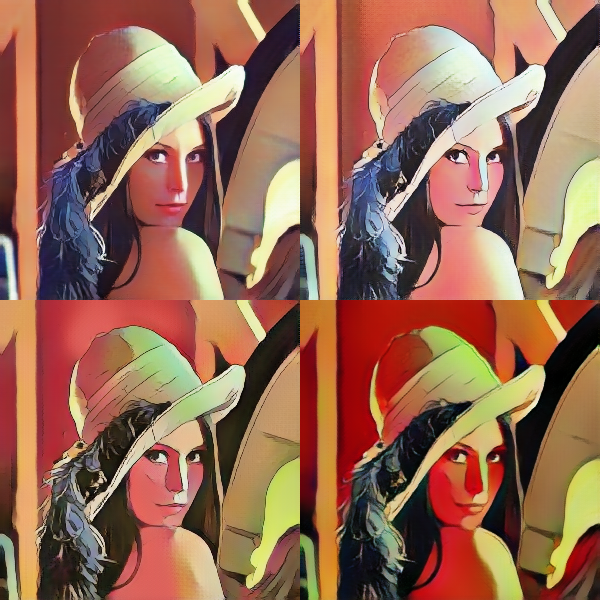

In [56]:
import sys
from PIL import Image

images = [Image.open(x) for x in fns]
widths, heights = zip(*(i.size for i in images))

total_width = widths[0] * 2
max_height = heights[0] * 2 

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
idx  = 0 
for im in images:
    new_im.paste(im, (widths[0]*int(idx /2), heights[0]*int(idx % 2)))
    x_offset += im.size[0]
    idx += 1

display(new_im)